# TP 4 - Fisher

## Ejercicio 4

* _Estudiar el error de clasificación variando la separación de 2 gaussianas isotrópicas utilizando el discriminante lineal de Fisher_

In [ ]:
clc;

In [5]:
function dir_opt = fisher(D_1, D_2)
    within = cov(D_1) + cov(D_2);
    dir_opt =(inv(within) * (mean(D_1) - mean(D_2))')';
endfunction

function scalar = scalar_project(v, w)
    if norm(w) == 0
        error("Fisher yielded zero vector");
    end
    scalar = v * (w' / norm(w));
endfunction

In [25]:
NSAMPLES = 100;
SEPARATION = 0:0.1:8;

error_percentage = [];
for separation = SEPARATION
    % Muestreo
    model_mu_1 = [0 0];
    model_sigma_1 = eye(2) * 2;
    model_mu_2 = [0 separation];
    model_sigma_2 = model_sigma_1;
    D_1 = [];
    D_2 = [];
    for i = 1:NSAMPLES
      D_1(i,:) = mvnrnd(model_mu_1, model_sigma_1);
      D_2(i,:) = mvnrnd(model_mu_2, model_sigma_2);
    end
    
    % Dirección Óptima (Fisher)
    dir_opt = fisher(D_1, D_2);
    
    % Proyección y Clasificación
    error_count = 0;
    frontier = scalar_project((mean(D_1) + mean(D_2))/2, dir_opt);
    for i = 1:NSAMPLES
      if scalar_project(D_1(i,:), dir_opt) > frontier
          error_count++;
      end
      if scalar_project(D_2(i,:), dir_opt) < frontier
          error_count++;
      end
    end
    
    % Porcentaje de Error
    error_percentage = [error_percentage error_count*100/(2*NSAMPLES)];
end

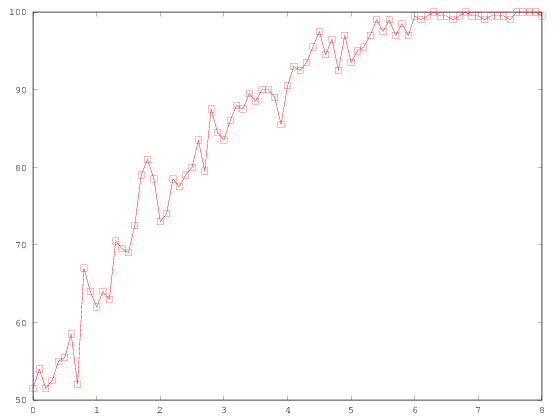

In [26]:
%% PLOT
plot(SEPARATION, error_percentage,
     "marker", "s", "color", "red")